# DSC 672 Group 5 Final Project Notebook

### Advancing Cardiovascular Risk Prediction: Deep Neural Networks, Gradient Boosting Machines, and Neural Architecture Search

### Crystal A Guzmán, Fatima Sumera Khatoon, Malyadri Sai Nunna


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, auc, roc_auc_score, log_loss, precision_score, recall_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, roc_curve, classification_report, roc_auc_score
from xgboost import XGBClassifier

import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam

import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
import torch.nn.functional as F


from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Exploratory Data Analysis (EDA)

In [2]:
# Load data
df = pd.read_csv('CVD_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [4]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
sum(df.isna().sum())

0

In [6]:
df.duplicated().sum()

80

In [7]:
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [8]:
# Target variable
df['Heart_Disease'] = df['Heart_Disease'].map({'No': 0, 'Yes': 1})

In [9]:
# Creating numerical and categorical columns
numerical = df.select_dtypes(include=['float64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

In [10]:
# Calculate correlations
corr_matrix = df[numerical.append(pd.Index(['Heart_Disease']))].corr()

c:\Users\xcguz\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


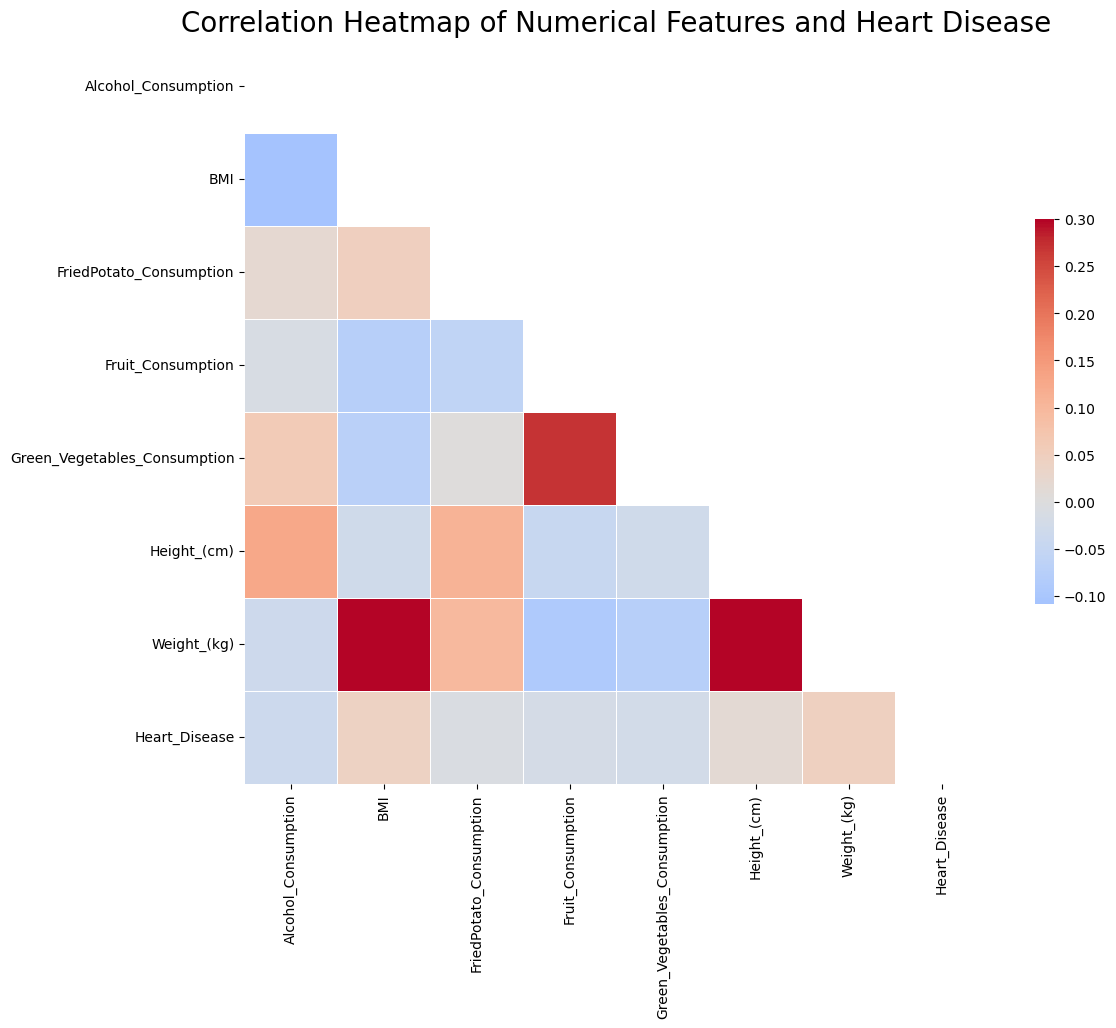

In [11]:
# Numerical Data

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap of Numerical Features and Heart Disease', fontsize=20)
plt.show()

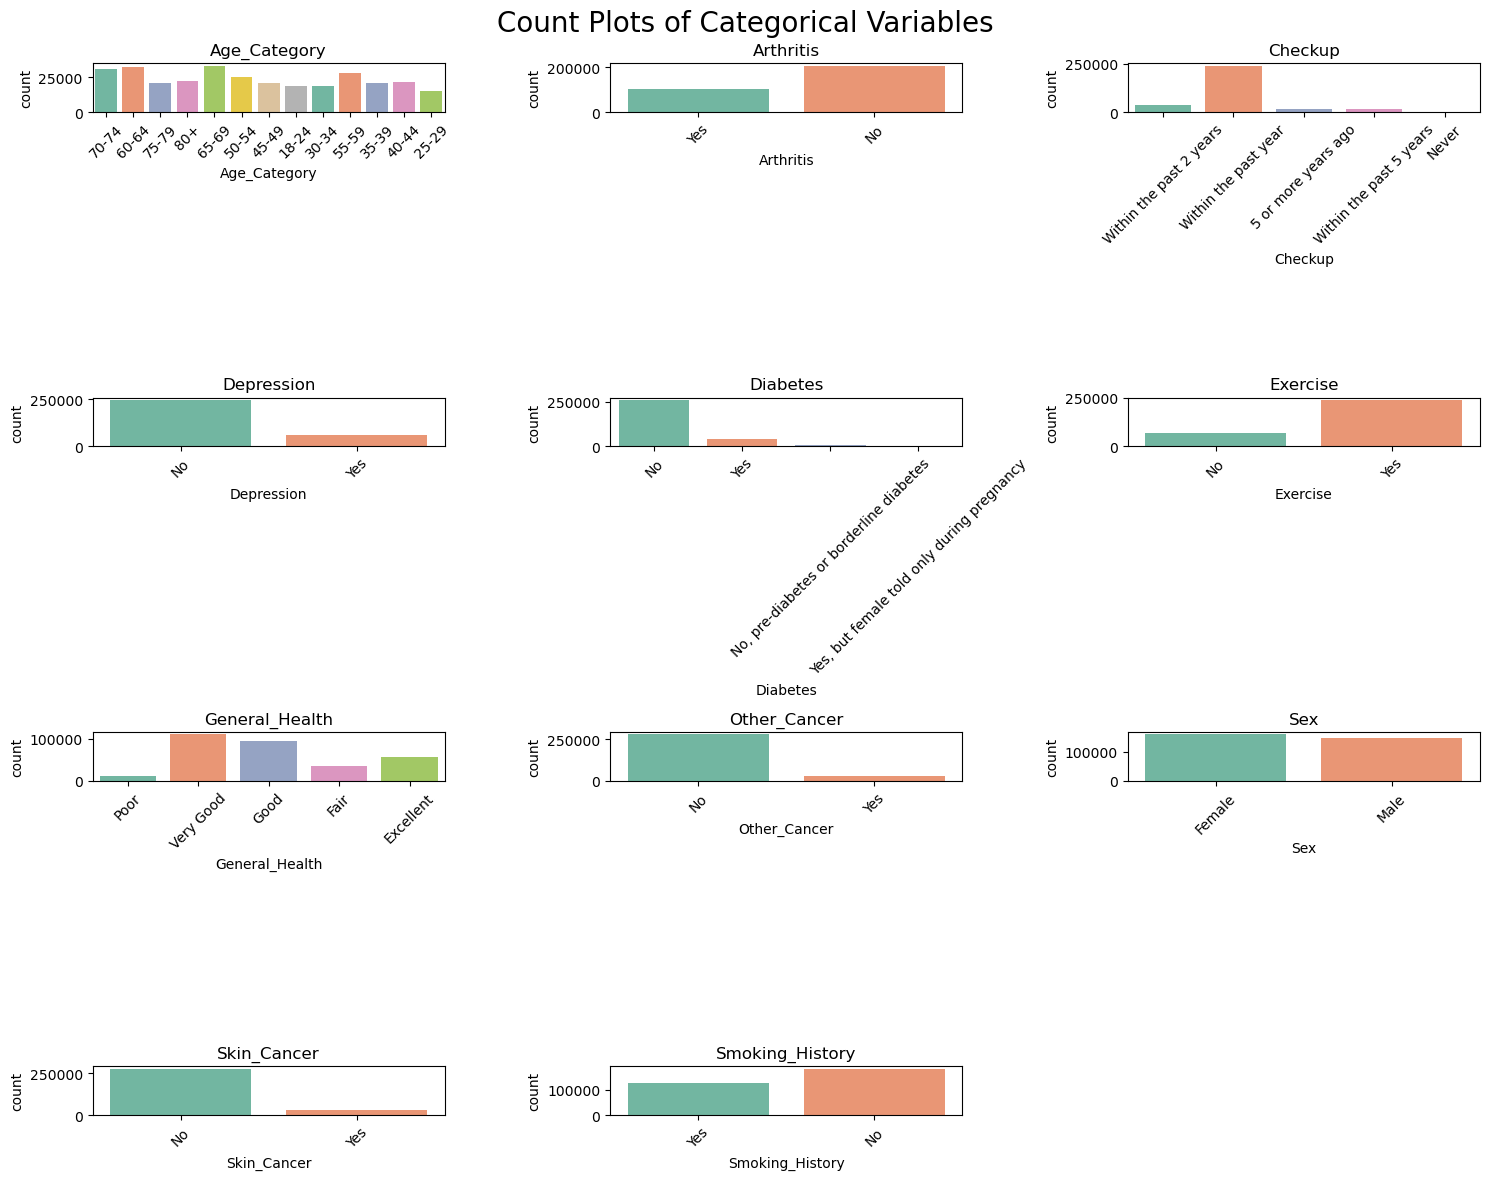

In [12]:
# Categorical Data

# Number of categorical columns
num_categorical = len(categorical)

# Calculate the number of rows and columns for the subplots
# Adjust these numbers based on how many plots you want per row
num_cols = 3
num_rows = -(-num_categorical // num_cols)  # Ceiling division

plt.figure(figsize=(15, num_rows * 3))  # Adjust the figure size as needed

for i, col in enumerate(categorical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=df[col], palette='Set2')
    plt.title(col)
    plt.xticks(rotation=45)  # Rotate the x labels to prevent overlap

plt.suptitle('Count Plots of Categorical Variables', fontsize=20)
plt.tight_layout()
plt.show()

# Preprocessing Pipeline

Categorical Pipeline

In [13]:
# OneHotEncoder converts categorical variables into dummy variables to be used by ML algorithms

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore',drop='first'))

Numerical Pipeline

In [14]:
# Methods are used:

# Function Transformer: Most of the numerical functions were skewed right, applies a logarithmic function log(x+1) to help fix the distribution
# Standard Scaler: Standardizes numerical features by removing the mean and scaling to unit variance.

num_pipeline = make_pipeline(
                            FunctionTransformer(np.log1p,feature_names_out='one-to-one'),
                            StandardScaler()
                            ) 

Ordinal Pipeline

In [16]:
# OrdinalEncoder: Converts categorical features to ordinal integers
# Variables were transformed based on their order, values with in the lowest order will start with 0 and increases by 1.

## Age Category Pipeline
agecat_pipeline = make_pipeline(
        OrdinalEncoder()
)

## General Health Pipeline
genhealth_pipeline = make_pipeline(
        OrdinalEncoder(categories=[['Poor','Fair','Good','Very Good','Excellent']])
)

## Checkup Pipeline
checkup_pipeline = make_pipeline(
        OrdinalEncoder(categories=[['Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago','Never']])
)

Pipeline List

In [17]:
# Setting each column to the pipeline where they will be used

num_pipe_col = numerical

cat_pipe_col = ['Arthritis', 'Depression', 'Diabetes',
    'Exercise', 'Other_Cancer', 'Sex',
    'Skin_Cancer', 'Smoking_History']

In [18]:
# Pipeline preprocessing steps are combined into a ColumnTransformer, which applies the appropriate transformations to each column.

preprocessing = ColumnTransformer([
    ('Categorical', cat_pipeline, cat_pipe_col),
    ('Age_Category', agecat_pipeline, ['Age_Category']),
    ('Checkup', checkup_pipeline, ['Checkup']),
    ('Gen_health', genhealth_pipeline, ['General_Health']),
    ('Numerical', num_pipeline, num_pipe_col),
], remainder='passthrough')

Train-Test Split: Split the data into training and testing sets.

In [19]:
# Split the data
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Apply preprocessing to training data BEFORE applying SMOTE
X_train_preprocessed = preprocessing.fit_transform(X_train)
X_test_preprocessed = preprocessing.transform(X_test)

In [21]:
# Now apply SMOTE on the preprocessed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Model Training and Evaluation

1. Model 1 - Extreme Gradient Boosting Machine (GBM) XGBoost:
Advanced GBM implementation or XGBoost was explored for its efficiency and scalability, potentially enhancing the predictive performance beyond what is achievable with traditional decision trees and random forests.


2. Model 2 - Keras Neural Network with KerasTuner:
AutoML approach within the TensorFlow and Keras ecosystem by using KerasTuner for hyperparameter optimization. This approach automates the process of selecting the best models and architectures, potentially discovering novel neural network structures that are more effective for cardiovascular risk prediction than those manually designed. 


3. Model 3 - Deep Neural Networks (DNNs):
DNNs were employed for their profound ability to discern intricate patterns within vast, high-dimensional datasets, surpassing traditional models in accuracy and recall, thus offering a nuanced understanding of cardiovascular risk factors.


## Model 1: Extreme Gradient Boosting Classifier Model

In [16]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, 
                    subsample=0.52, colsample_bytree=0.6, seed=27, reg_lambda=2, 
                    booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

### Fitting the model with training dataset

In [17]:
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.6, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=25,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### Predict the model against testing sample

In [18]:
y_predicted = xgb.predict(X_test_preprocessed)

### Calculate the performance metrics

In [19]:
# Calculate accuracy score 
acc_score = accuracy_score(y_test, y_predicted)

In [20]:
print(f"Accuracy of Extreme Gradient Boost Classifier: {(acc_score * 100):.2f}\n")
print("Extreme Gradient Boost Classifier Classification Report:")
print(classification_report(y_test, y_predicted))

Accuracy of Extreme Gradient Boost Classifier: 86.89

Extreme Gradient Boost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     56774
           1       0.30      0.45      0.36      4997

    accuracy                           0.87     61771
   macro avg       0.62      0.68      0.64     61771
weighted avg       0.90      0.87      0.88     61771



### Heatmap showing confusion matrix

In [21]:
# Generate confusion metrics
conf_matrix = confusion_matrix(y_test, y_predicted)

In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))

Confusion Matrix:
[[51428  5346]
 [ 2752  2245]]


C:\Users\xcguz\AppData\Local\Temp\ipykernel_8600\3236828177.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['Predicted No', 'Predicted Yes'])
C:\Users\xcguz\AppData\Local\Temp\ipykernel_8600\3236828177.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['Actual No', 'Actual Yes'])


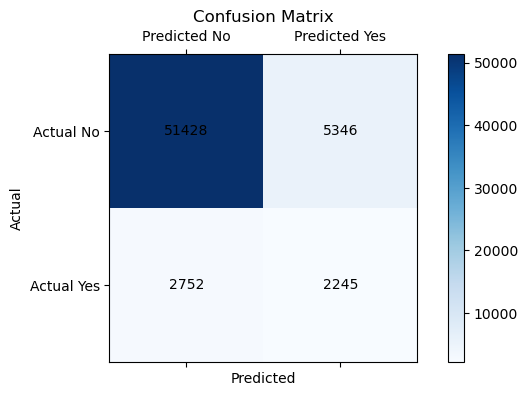

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix
conf_matrix = np.array([[51428, 5346],
                        [2752, 2245]])

fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the figure size as needed

# Use Matplotlib to plot the heatmap
cax = ax.matshow(conf_matrix, cmap='Blues')

# Add color bar for reference
fig.colorbar(cax)

# Add annotations
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# Set axis labels
ax.set_xticklabels([''] + ['Predicted No', 'Predicted Yes'])
ax.set_yticklabels([''] + ['Actual No', 'Actual Yes'])

# Set labels and title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


### Plot ROC curve

In [23]:
# Calculate AUC
rf_auc = roc_auc_score(y_test, y_predicted)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_predicted)

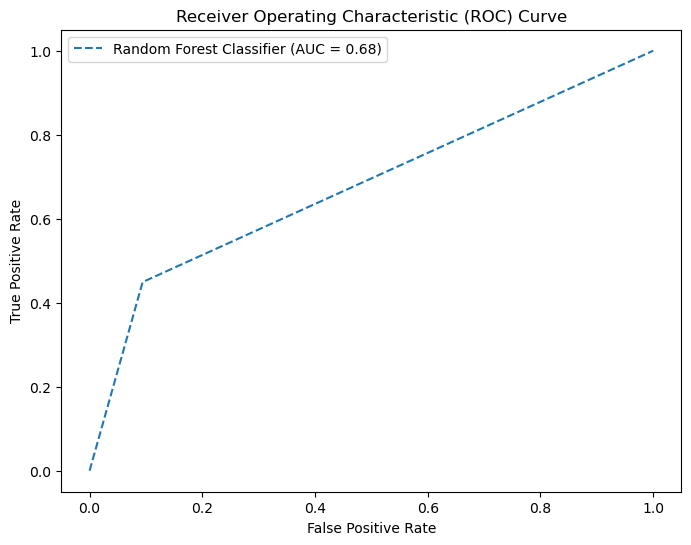

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Model 2: TensorFlow Keras Classifier Model with Keras Tuner

### Model Definition with Preprocessing

In [31]:
# The build_model function defines the structure of the neural network and includes the preprocessing steps Input Layer, Hidden Layers,and Output Layers. 

def build_model(hp):
    model = Sequential() 
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), # Allows Keras Tuner to experiment with different numbers of neurons in the layer, ranging from 32 to 512, stepping by 32 each time.
                    activation='relu', input_shape=(X_train_resampled.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) # Can help prevent overfitting (regularization) by randomly setting input units to 0 at each update during training time.
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')), # The model is compiled with the Adam optimizer, where the learning rate is also a tunable parameter.
                loss='binary_crossentropy',
                metrics=['accuracy'])

    return model

### Keras Tuner for Hyperparameter Tuning

In [32]:
tuner = kt.RandomSearch( #  Is used for searching the hyperparameter space.
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1, # Each set of hyperparameters will be tested once.
    directory='keras_tuner_dir',
    project_name='keras_tuner_SMOTE'
)

In [33]:
# SMOTE ONLY Starts the hyperparameter optimization process.

tuner.search(X_train_resampled, y_train_resampled, epochs=10, validation_split=0.2)

Trial 10 Complete [00h 06m 41s]
val_accuracy: 0.797234833240509

Best val_accuracy So Far: 0.8788252472877502
Total elapsed time: 01h 56m 02s


### Evaluate the Best Model

In [34]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\xcguz\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [35]:
# SMOTE APPROACH Evaluate the best model on the test data
loss, accuracy = best_model.evaluate(X_test_preprocessed, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

1931/1931 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8531 - loss: 0.3178
Test Loss: 0.3162105977535248, Test Accuracy: 0.8551262021064758


### Performance Metrics

In [36]:
# Predict classes (or probabilities) for X_test_preprocessed
# For binary classification, it is useful to get the predicted probabilities to adjust the decision threshold
y_pred_probs = best_model.predict(X_test_preprocessed)
# y_pred = (y_pred_probs > 0.5).astype("int32")  # Convert probabilities to class labels based on 0.5 threshold

1931/1931 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [37]:
from sklearn.metrics import f1_score


thresholds = np.linspace(0.3, 0.7, 101)  # Generate 101 threshold values between 0 and 1
best_threshold = 0
best_f1 = 0

for threshold in thresholds:
    # Convert probabilities to binary predictions based on the current threshold
    y_pred_threshold = (y_pred_probs > threshold).astype(int)
    
    # Calculate the F1 score for the current threshold
    f1 = f1_score(y_test, y_pred_threshold)
    
    # Update the best threshold if the current F1 score is better than what we've seen so far
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

Best Threshold: 0.432
Best F1 Score: 0.3310327360222884


In [38]:
# Adjusting the threshold
threshold = 0.432
y_pred = (y_pred_probs > threshold).astype("int32")

# Recompute performance metrics with the new threshold
print("Adjusted Classification Report:")
print(classification_report(y_test, y_pred))

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56774
           1       0.24      0.52      0.33      4997

    accuracy                           0.83     61771
   macro avg       0.60      0.69      0.62     61771
weighted avg       0.90      0.83      0.86     61771



### Heatmap showing confusion matrix

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[48592  8182]
 [ 2383  2614]]


In [53]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[48592  8182]
 [ 2383  2614]]


C:\Users\xcguz\AppData\Local\Temp\ipykernel_8600\3937392984.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['Predicted No', 'Predicted Yes'])
C:\Users\xcguz\AppData\Local\Temp\ipykernel_8600\3937392984.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['Actual No', 'Actual Yes'])


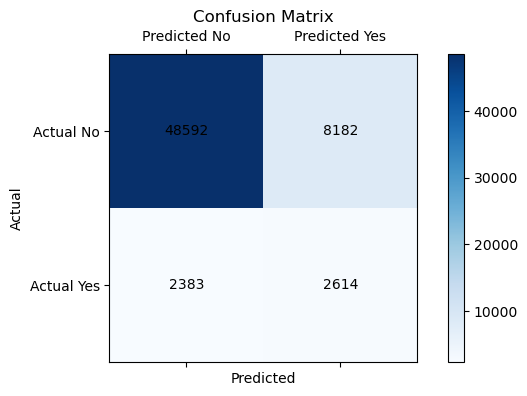

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix array
conf_matrix = np.array([[48592, 8182],
                        [2383, 2614]])

fig, ax = plt.subplots(figsize=(8, 4))  

# Use Matplotlib to plot the heatmap
cax = ax.matshow(conf_matrix, cmap='Blues')

# Add color bar for reference
fig.colorbar(cax)

# Add annotations
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# Set axis labels
ax.set_xticklabels([''] + ['Predicted No', 'Predicted Yes'])
ax.set_yticklabels([''] + ['Actual No', 'Actual Yes'])

# Set labels and title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


### Plot ROC curve

In [60]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, log_loss

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')

# Compute Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Compute Log Loss
logloss = log_loss(y_test, y_pred)
print(f'Log Loss: {logloss:.2f}')

ROC AUC: 0.69
Precision-Recall AUC: 0.40
Log Loss: 6.16


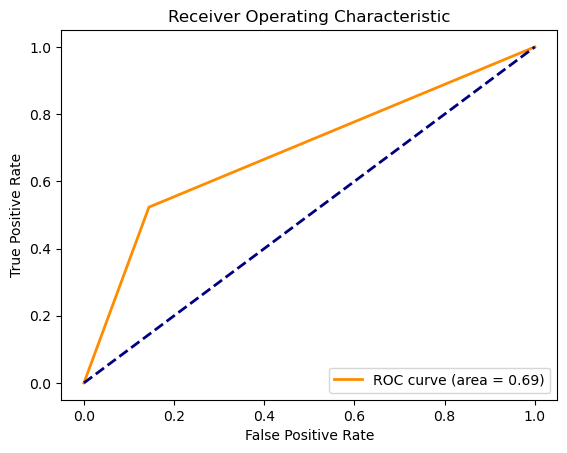

In [61]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

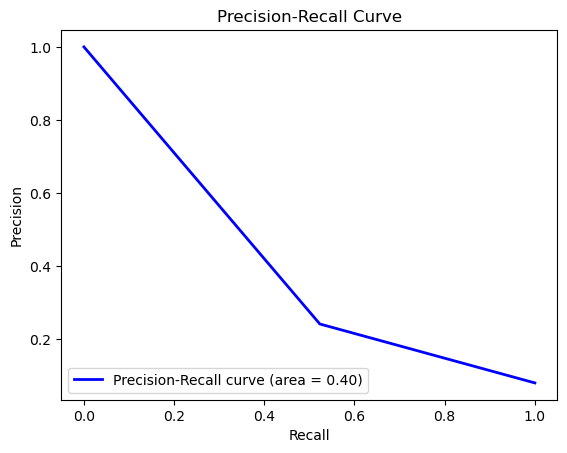

In [62]:
# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

## Model 3: Deep Neural Network (DNN) Classifier Model

In [13]:
# Step 1: Convert the preprocessed data into PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_preprocessed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [14]:
# Step 2: Create a dataset and dataloader for both training and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
number_of_features = X_train_resampled.shape
number_of_features

(454218, 20)

In [16]:
# Step 3: Define a neural network model
class HeartDiseasePredictor(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(HeartDiseasePredictor, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.dropout(x, p=0.5)
        x = F.relu(self.layer2(x))
        x = F.dropout(x, p=0.5)
        x = torch.sigmoid(self.layer3(x))  # Using sigmoid for the binary classification output
        return x

input_size = 20  # number of input features
hidden_size1 = 64  # number of neurons in the first hidden layer
hidden_size2 = 32  # number of neurons in the second hidden layer
output_size = 1  # number of output neurons (1 for binary classification)
# Instantiate the model
model = HeartDiseasePredictor(input_size, hidden_size1, hidden_size2, output_size)

In [24]:
# Step 4: Set up the loss function and optimizer
loss_function = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = Adam(model.parameters(), lr=0.001)

In [25]:
# Step 5: Create the training loop to train the model on the resampled training data
def train_model(model, train_loader, loss_function, optimizer, epochs=25):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()  # Clear the gradients
            output = model(data)  # Forward pass
            loss = loss_function(output, target)  # Compute the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update the weights

            if batch_idx % 10 == 0:
                print(f'Epoch: {epoch+1}, Batch: {batch_idx}, Loss: {loss.item()}')

In [28]:
# Step 6: Create the evaluation loop to assess the model's performance on the test data
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad():  # No need to track the gradients
        for data, target in test_loader:
            output = model(data)
            test_loss += loss_function(output, target).item()  # Sum up batch loss
            pred = (output > 0.5).float()  # Convert probabilities to binary output
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)')

In [31]:
train_model(model, train_loader, loss_function, optimizer, epochs=25)
evaluate_model(model, test_loader)

Epoch: 1, Batch: 0, Loss: 0.7013920545578003
Epoch: 1, Batch: 10, Loss: 0.6743359565734863
Epoch: 1, Batch: 20, Loss: 0.6491637825965881
Epoch: 1, Batch: 30, Loss: 0.6570677757263184
Epoch: 1, Batch: 40, Loss: 0.6791477203369141
Epoch: 1, Batch: 50, Loss: 0.6423695087432861
Epoch: 1, Batch: 60, Loss: 0.7025014758110046
Epoch: 1, Batch: 70, Loss: 0.6210632920265198
Epoch: 1, Batch: 80, Loss: 0.4985475540161133
Epoch: 1, Batch: 90, Loss: 0.5571947693824768
Epoch: 1, Batch: 100, Loss: 0.5732065439224243
Epoch: 1, Batch: 110, Loss: 0.5607762336730957
Epoch: 1, Batch: 120, Loss: 0.49704113602638245
Epoch: 1, Batch: 130, Loss: 0.631925106048584
Epoch: 1, Batch: 140, Loss: 0.5644093751907349
Epoch: 1, Batch: 150, Loss: 0.5155864953994751
Epoch: 1, Batch: 160, Loss: 0.7572131156921387
Epoch: 1, Batch: 170, Loss: 0.59389328956604
Epoch: 1, Batch: 180, Loss: 0.6182011365890503
Epoch: 1, Batch: 190, Loss: 0.5011968016624451
Epoch: 1, Batch: 200, Loss: 0.5898481607437134
Epoch: 1, Batch: 210, Loss

In [32]:
outputs = []
targets = []
with torch.no_grad():  
    for data, target in test_loader:
        output = model(data)
        outputs.append(output.numpy())
        targets.append(target.numpy())

# Flatten the list of outputs and targets and apply the threshold
y_pred = np.concatenate(outputs).flatten()
y_pred = (y_pred > 0.5).astype(int)  # Apply threshold and convert to integer type
y_true = np.concatenate(targets).flatten()

In [33]:
def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'Sensitivity: {sensitivity:.4f}')
    
    return precision, recall, f1, accuracy, specificity, sensitivity

In [40]:
calculate_metrics(y_true, y_pred)

Precision: 0.1962
Recall: 0.7242
F1 Score: 0.3088
Accuracy: 0.7377
Specificity: 0.7389
Sensitivity: 0.7242


(0.19620493358633775,
 0.7242345407244346,
 0.3087620510195376,
 0.7376762558482136,
 0.7388593370204671,
 0.7242345407244346)

In [45]:
print("DNN Classifier Classification Report:")
print(classification_report(y_test, y_pred))

DNN Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     56774
           1       0.20      0.72      0.31      4997

    accuracy                           0.74     61771
   macro avg       0.58      0.73      0.57     61771
weighted avg       0.91      0.74      0.80     61771



In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[41948 14826]
 [ 1378  3619]]


C:\Users\xcguz\AppData\Local\Temp\ipykernel_27600\2879096446.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['Predicted No', 'Predicted Yes'])
C:\Users\xcguz\AppData\Local\Temp\ipykernel_27600\2879096446.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['Actual No', 'Actual Yes'])


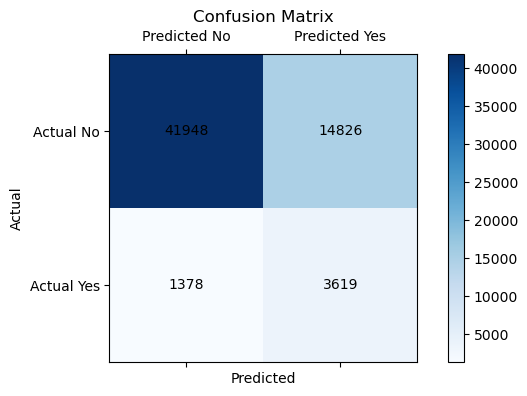

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix
conf_matrix = np.array([[41948, 14826],
                        [1378, 3619]])

fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the figure size as needed

# Use Matplotlib to plot the heatmap
cax = ax.matshow(conf_matrix, cmap='Blues')

# Add color bar for reference
fig.colorbar(cax)

# Add annotations
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# Set axis labels
ax.set_xticklabels([''] + ['Predicted No', 'Predicted Yes'])
ax.set_yticklabels([''] + ['Actual No', 'Actual Yes'])

# Set labels and title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


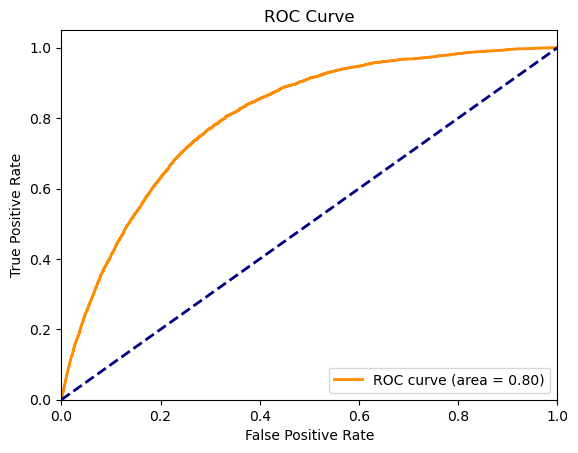

In [48]:
model_outputs = []
targets = []

# Evaluate the model to get the raw output probabilities
with torch.no_grad():  # No need to track the gradients
    for data, target in test_loader:
        output = model(data)
        model_outputs.extend(output.numpy())  # Collect raw model outputs
        targets.extend(target.numpy())  # Collect true labels

# Now model_outputs contains the raw probabilities and targets contains the true labels
model_outputs = np.array(model_outputs).flatten()
y_true = np.array(targets).flatten()

# Use these to calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, model_outputs)
roc_auc = auc(fpr, tpr)

# Now you can plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Common algorithms trained on CVD datasets

In [23]:
# Define the helper function
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name=''):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred)}\n\n")

In [24]:
# List of models to train
models = [
    (MLPClassifier(max_iter=1000), "MLP"),
    (GaussianNB(), "Naive Bayes"),
    (DecisionTreeClassifier(), "Decision Tree"),
    (RandomForestClassifier(), "Random Forest"),
    (KNeighborsClassifier(), "KNN"),
    (make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)), "Logistic Regression"),
    # Using LinearSVC for faster performance on large datasets
    (make_pipeline(StandardScaler(), LinearSVC(max_iter=1000)), "SVM Linear")
]

# Iterate over the models, training and evaluating each one
for model, name in models:
    train_evaluate_model(model, X_train_resampled, y_train_resampled, X_test_preprocessed, y_test, model_name=name)

Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     56774
           1       0.22      0.60      0.32      4997

    accuracy                           0.79     61771
   macro avg       0.59      0.71      0.60     61771
weighted avg       0.90      0.79      0.83     61771

Accuracy for MLP: 0.7944180926324651


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      0.62      0.76     56774
           1       0.16      0.82      0.27      4997

    accuracy                           0.64     61771
   macro avg       0.57      0.72      0.51     61771
weighted avg       0.91      0.64      0.72     61771

Accuracy for Naive Bayes: 0.6390377361545062


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     56774
           1       0.19      0.25      0

c:\Users\xcguz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report for SVM Linear:
              precision    recall  f1-score   support

           0       0.98      0.73      0.83     56774
           1       0.20      0.79      0.33      4997

    accuracy                           0.73     61771
   macro avg       0.59      0.76      0.58     61771
weighted avg       0.91      0.73      0.79     61771

Accuracy for SVM Linear: 0.7330462514772305




# Best Model and Future Work

When evaluating the best model for predicting cardiovascular disease (CVD), it's crucial to consider not just accuracy but also precision, recall (sensitivity), and F1-scores, especially for the minority class (1, representing "Yes" for heart disease). The ideal model should balance these metrics, particularly maximizing recall for class 1 to ensure that as many true CVD cases as possible are detected, while also maintaining a reasonable level of precision to avoid too many false positives.

Therefore, given the critical nature of predicting CVD accurately, the XGB Classifier appears to be the best choice among the models trained. It offered the highest accuracy and a reasonable balance between precision and recall for detecting heart disease. Its F1-score for the minority class is also among the highest, indicating a good balance between precision and recall. This model is likely to maximize the detection of true CVD cases while keeping the number of false positives relatively low, making it a pragmatic choice for medical diagnostics.

Based on the work done and the models evaluated, here are some suggestions for future work to further improve CVD prediction: Feature Engineering, investigation of Deep Learning Convolutional Neural Network, and expanded hyperparameter tuning such as Bayesian Optimization.

# Project Code Contributions

1. Crystal A Guzmán
- Adaptation of preprocessing pipeline, Keras classifier with KerasTuner model and multiple commonly used CVD model training with helper funtion.
2. Fatima Sumera Khatoon
- EDA, XGBoot model
3. Malyadri Sai Nunna
- DNN model